In [1]:
#! python -m pip install --user opencv-contrib-python

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show_dataset (images_class, label) :
    # show doata for 1 class
    plt.figure(figsize = (14,5))
    k = 0
    for i in range(1,6):
        plt.subplot(1,5,i)
        try :
            plt.imshow(images_class[k][:, :, ::-1])
        except :
            plt.imshow(images_class[k], cmap = 'gray')
        plt.title(label)
        plt.axis('off')
        plt.tight_layout()
        k += 1
    plt.show()

In [4]:
dataset_folder = "lib_small/"
#dataset_folder = "dataset/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    for name in os.listdir(os.path.join(dataset_folder, folder))[:70]: #limit nb of faces per class to 70
        img = cv2.imread(os.path.join(dataset_folder + folder, name))
        images.append(img)
        names.append(folder)


In [5]:
labels = np.unique(names)
labels

array(['Albena', 'AlexandreF', 'Dorian', 'Erwan', 'Gauthier', 'Unknown'],
      dtype='<U10')

In [6]:
for label in labels:
    ids = np.where(label == np.array(names))[0]
    images_class = images[ids[0] : ids[-1] + 1]
    #show_dataset(images_class, label)

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

85
85
['Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'Albena', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'AlexandreF', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Dorian', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Erwan', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Gauthier', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown']


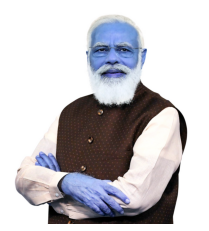

In [8]:
print(len(names))
print(len(images))
print(names)
for i, img in enumerate(images) :
    if(i == 84) :
        plt.figure()
        plt.imshow(img, cmap="gray")
        plt.axis(False)
        plt.show()

In [9]:
def detect_face(img, idx):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    try :
        x, y, w, h = faces[0]

        img = img[y:y+h, x:x+w]
        img = cv2.resize(img, (100, 100))
    except :
        print("Face not found in image index", i)
        img = None
    return img
cv2.waitKey(0)        
cv2.destroyAllWindows()

In [10]:
croped_images = []
for i, img in enumerate(images) :
    img = detect_face(img, i)
    if img is not None :
        croped_images.append(img)
    else :
#         print("found")
#         img = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
#         print("cut")
#         cv2.imshow(img)
#         print("showed")
        del names[i]
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Face not found in image index 84


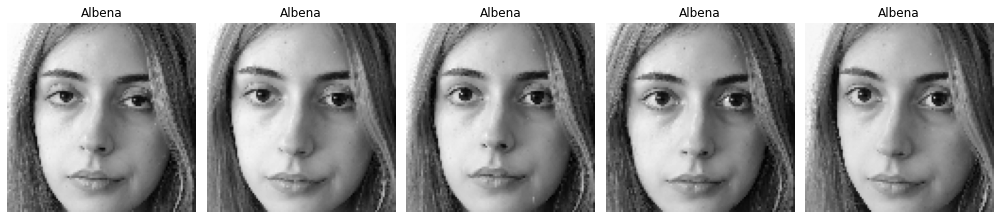

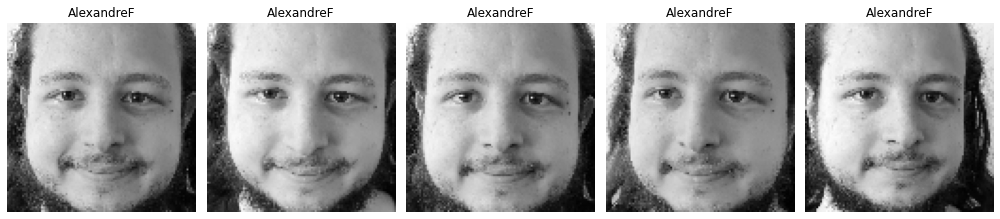

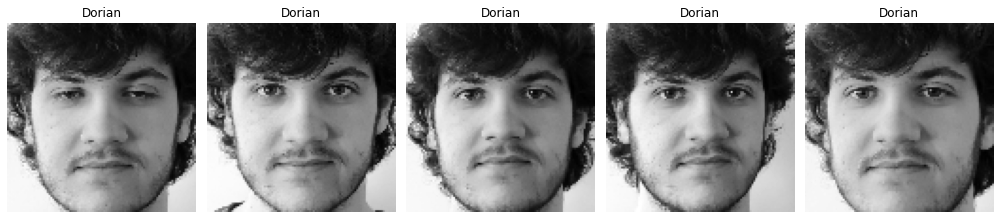

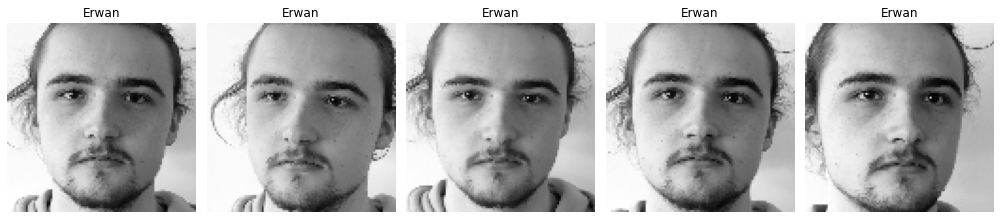

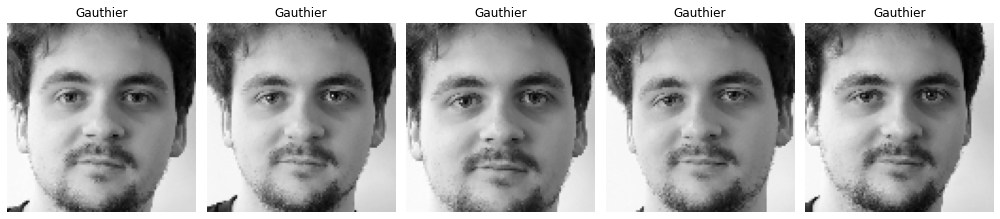

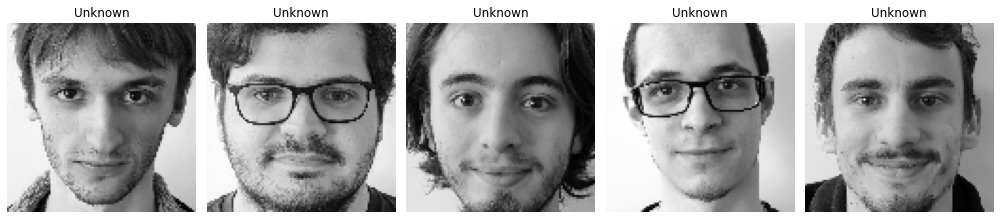

In [11]:
for label in labels:  
    ids = np.where(label== np.array(names))[0]
    images_class = croped_images[ids[0] : ids[-1] + 1] # select croped images for each class
    show_dataset(images_class, label)

In [12]:
name_vec = np.array([np.where(name == labels)[0][0] for name in names])
print(len(name_vec))
print(len(labels))

84
6


In [13]:
# model = cv2.face.EigenFaceRecognizer_create()
# model = cv2.face.FisherFaceRecognizer_create()
model = cv2.face.LBPHFaceRecognizer_create()

In [14]:
model.train(croped_images, name_vec)

In [15]:
#save & load model
model.save("eigen_model.yml")
model.read("eigen_model.yml")

In [17]:
#test model
path = "lib_test/AlexandreF1.jpg"
img = cv2.imread(path)
img = detect_face(img, 0)

idx, confidence = model.predict(img)
 
print("Found: ", labels[idx])
print("Confidence: ", confidence)

plt.figure()
plt.imshow(img, cmap="gray")
plt.axis(False)
plt.show()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# test_folder = "lib_test/"
# actual_names = []
# predicted_names = []
# confidences = []
# for filename in os.listdir(test_folder):
#     if filename.find(".jpg") > -1:
#         path = os.path.join(test_folder, filename)
        
#         img = cv2.imread(path)
#         img = detect_face(img, 0)

#         idx, confidence = model.predict(img)
#         print(filename)
#         actual_names.append(np.where(filename[:-5] == labels)[0][0]) #get label from filename (remove 9 last char)
#         predicted_names.append(idx)
#         confidences.append(confidence)
        
#         print("Actual \t: ", filename)
#         print("Predic \t: ", labels[idx])
#         print("Confidence \t: ", confidence)

#         plt.figure()
#         plt.imshow(img, cmap="gray")
#         plt.axis(False)
#         plt.show()


In [18]:
# Test real time video 
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img


In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened() :
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (100, 100))
                
            idx, confidence = model.predict(face_img)
            #label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            label_text = "%s" % (labels[idx])

            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
cv2.waitKey(0)        
cv2.destroyAllWindows()
cap.release()